# Corpus Stufenstatistiken

<img src="res/dakoda-logo.png" width="200">

In [3]:
from dakoda.corpus import DakodaCorpus
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl


<Axes: xlabel='Stage', ylabel='Count'>

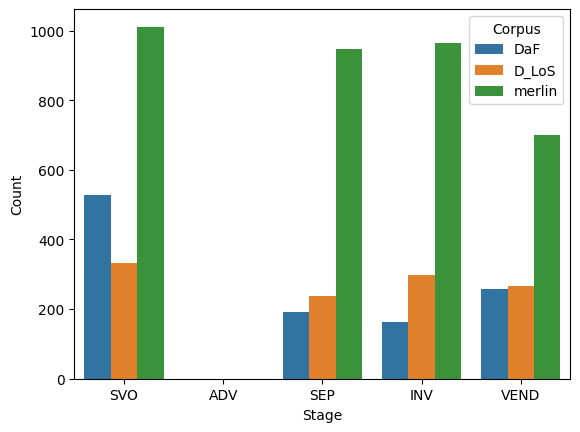

In [5]:
from dakoda.query import annotation, count, eq, view

def count_stages(corpus, stage_value):
    """ Count documents in the corpus that have at least one annotation with the given stage_value."""
    q = count(view('learner') & annotation('Stage') & eq(stage_value), 'gt', 0)
    return len(list(corpus[q]))

wtld = DakodaCorpus("data/swiko_wtld/DaF")
wtld2 = DakodaCorpus("data/swiko_wtld/D_LoS")
merlin = DakodaCorpus("data/merlin")

rows = []
for corpus in [wtld, wtld2, merlin]:
    for stage in ['SVO', 'ADV', 'SEP', 'INV', 'VEND']:
        rows.append({'Corpus': corpus.name,
                     'Stage': stage,
                     'Count': count_stages(corpus, stage)})

df = pl.DataFrame(rows)

sns.barplot(data=df,
            x='Stage',
            y='Count',
            hue='Corpus')